In [5]:
import pandas as pd

#ici on lit le fichier CSV lié à la station du 18ème

df = pd.read_csv("/Users/Edouard_1/Deep Air project/PA75018.csv")
df = df.drop(columns="Unnamed: 0")
#df["date"]= df[df.Date_time
df










,Date_time,PM25,PM10,NO2,NO,NOX,O3,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,14.2,14.0,0.0,15.3,66.0,75018 - Flocon,Urbain
1,2018/01/01 02:00:00+00,NaN,13.0,14.0,1.0,16.3,66.0,75018 - Flocon,Urbain
2,2018/01/01 03:00:00+00,NaN,11.6,14.0,0.0,15.8,64.0,75018 - Flocon,Urbain
3,2018/01/01 04:00:00+00,NaN,11.9,15.0,0.0,17.2,62.0,75018 - Flocon,Urbain
4,2018/01/01 05:00:00+00,NaN,14.5,14.0,0.0,14.8,62.0,75018 - Flocon,Urbain
...,...,...,...,...,...,...,...,...,...
42667,2022/11/13 20:00:00+00,20.5,23.2,28.3,20.1,59.1,0.7,75018 - Flocon,Urbain
42668,2022/11/13 21:00:00+00,22.6,22.5,27.9,12.9,47.8,1.2,75018 - Flocon,Urbain
42669,2022/11/13 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain
42670,2022/11/13 23:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain


In [6]:
#Ici on applique une fonction sur la colonne date pour extraire les dates sans les heures dans une nouvelle colonne 

def left_string(x):
    return x[0:10]


df["date"]=df.Date_time.apply(left_string)
df




,Date_time,PM25,PM10,NO2,NO,NOX,O3,Station_name,Station_type,date
0,2018/01/01 01:00:00+00,NaN,14.2,14.0,0.0,15.3,66.0,75018 - Flocon,Urbain,2018/01/01
1,2018/01/01 02:00:00+00,NaN,13.0,14.0,1.0,16.3,66.0,75018 - Flocon,Urbain,2018/01/01
2,2018/01/01 03:00:00+00,NaN,11.6,14.0,0.0,15.8,64.0,75018 - Flocon,Urbain,2018/01/01
3,2018/01/01 04:00:00+00,NaN,11.9,15.0,0.0,17.2,62.0,75018 - Flocon,Urbain,2018/01/01
4,2018/01/01 05:00:00+00,NaN,14.5,14.0,0.0,14.8,62.0,75018 - Flocon,Urbain,2018/01/01
...,...,...,...,...,...,...,...,...,...,...
42667,2022/11/13 20:00:00+00,20.5,23.2,28.3,20.1,59.1,0.7,75018 - Flocon,Urbain,2022/11/13
42668,2022/11/13 21:00:00+00,22.6,22.5,27.9,12.9,47.8,1.2,75018 - Flocon,Urbain,2022/11/13
42669,2022/11/13 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain,2022/11/13
42670,2022/11/13 23:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,75018 - Flocon,Urbain,2022/11/13


In [7]:
#Ici on calcule le pourcentage de NAN par colonne 

total = df.isnull().sum().sort_values(ascending = False)
percent = total / len(df) * 100
percent




PM25            83.103675
PM10             3.620641
NO2              3.308961
NO               3.308961
NOX              3.308961
O3               2.139576
Date_time        0.000000
Station_name     0.000000
Station_type     0.000000
date             0.000000
dtype: float64

In [9]:
#Ici on groupby par date pour les colonnes liées aux particules qui sont calculées en réalisant une moyenne journalière 

df_pm = df.groupby(by="date")[['PM25','PM10']].mean()
df_pm





,PM25,PM10
date,,
2018/01/01,NaN,10.665217
2018/01/02,NaN,15.362500
2018/01/03,NaN,14.416667
2018/01/04,NaN,9.358333
2018/01/05,NaN,13.150000
...,...,...
2022/11/10,11.300000,18.820833
2022/11/11,11.404167,14.129167
2022/11/12,20.741667,27.429167


In [10]:
#Ici on groupby par date pour les colonnes liées à l'Ozone 03 - le dioxyde d'azote NO2 et le dioxyde de souffre SO2 qui sont calculées en réalisant un max journalier 


df_pollu = df.groupby(by="date")[['O3','NO2']].max()
df_pollu




,O3,NO2
date,,
2018/01/01,66.0,25.0
2018/01/02,62.0,56.0
2018/01/03,70.0,35.0
2018/01/04,57.0,40.0
2018/01/05,71.0,64.0
...,...,...
2022/11/10,43.0,50.8
2022/11/11,42.2,41.3
2022/11/12,12.1,54.2


In [11]:
#Ici on merge les deux dataframes créées pour en faire un seul 

df_merged = pd.merge(df_pm,df_pollu,on="date")
df_merged




,PM25,PM10,O3,NO2
date,,,,
2018/01/01,NaN,10.665217,66.0,25.0
2018/01/02,NaN,15.362500,62.0,56.0
2018/01/03,NaN,14.416667,70.0,35.0
2018/01/04,NaN,9.358333,57.0,40.0
2018/01/05,NaN,13.150000,71.0,64.0
...,...,...,...,...
2022/11/10,11.300000,18.820833,43.0,50.8
2022/11/11,11.404167,14.129167,42.2,41.3
2022/11/12,20.741667,27.429167,12.1,54.2


In [12]:
# On regarde le pourcentage de nan sur ce nouveau df 


total_merged = df_merged.isnull().sum().sort_values(ascending = False)
percent_merged = total_merged / len(df_merged) * 100
percent_merged



PM25    82.349635
NO2      2.304666
PM10     0.899382
O3       0.843170
dtype: float64

<AxesSubplot:xlabel='PM25', ylabel='Count'>

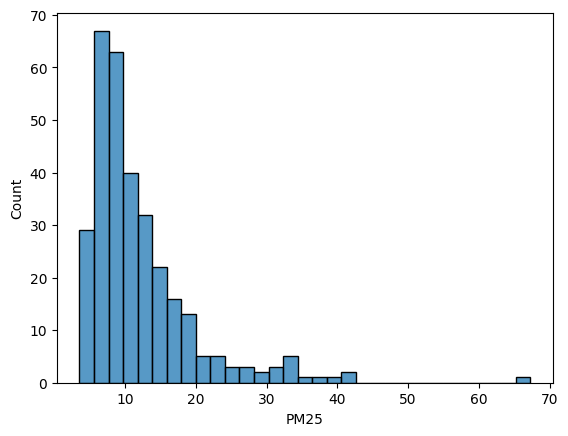

In [13]:
import seaborn as sns

sns.histplot(df_merged,x="PM25")




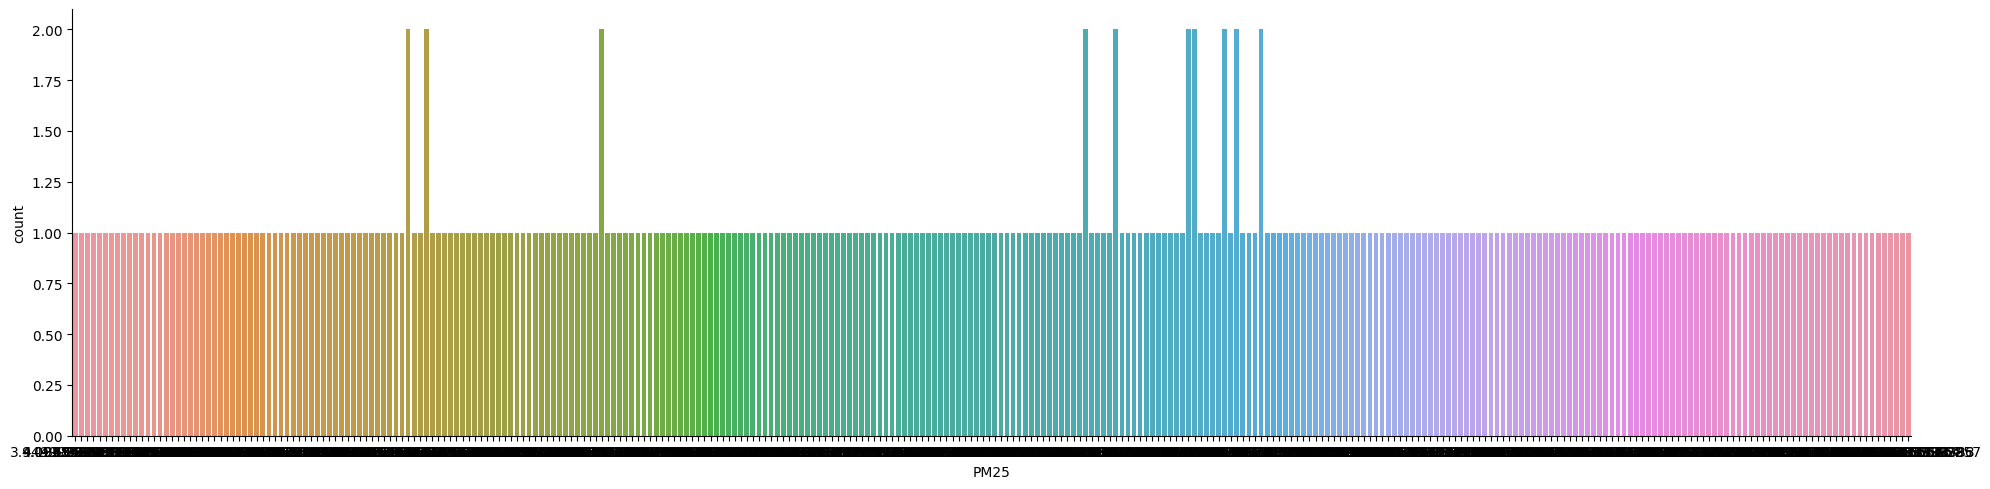

In [14]:
sns.catplot(x = "PM25", kind = "count",  data = df_merged, height=5, aspect = 4)

